<a href="https://colab.research.google.com/github/Jordymesa17/Codigo-clase/blob/main/analtica%20fin%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nueva sección

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

In [2]:

# Carga de datos
datos = pd.read_csv('vias_rurales_secop_i_raw_data_v13082024.csv')

# Revisa las primeras y últimas filas para tener una idea general de los registros
datos.head(5)

,uid,nombre_de_la_entidad,departamento_entidad,orden_entidad,modalidad,causal_contratacion_directa,objeto_a_contratar,detalle_objeto,cuantia_proceso,cuantia_contrato,...,tiempo_adiciones_en_meses,fecha_fin_ejec_contrato,id_adjudicacion,urlproceso,nit_de_la_entidad,identificacion_del_contratista,dpto_y_muni_contratista,municipio_entidad,nom_razon_social_contratista,estado_del_proceso
0,15-4-4221275-3896250,LA GUAJIRA - ALCALDIA MUNICIPIO DE BARRANCAS,LA GUAJIRA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,REGIMEN ESPECIAL,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MEJORAMIENTO Y ADECUACION DE LAS VIAS EXISTENT...,51960000,51960000,...,0,2015-07-12T00:00:00.000,3896250,{'url': 'https://www.contratos.gov.co/consulta...,800099223-3,900514557-1,LA GUAJIRA,BARRANCAS,ASOCIACION DE CAFICULTORES DE BARRANCAS,LIQUIDADO
1,15-11-4173928-3984265,SANTANDER - ALCALDIA MUNICIPIO DE PIEDECUESTA,SANTANDER,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 4,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MEJORAMIENTO DE LAS VIAS TERCIARIAS DE LA VERE...,149999947,149999946,...,0,2015-12-19T00:00:00.000,3984265,{'url': 'https://www.contratos.gov.co/consulta...,817000992-5,9008974759,SANTANDER,PIEDECUESTA,UNION TEMPORAL HUELLAS 2015,LIQUIDADO
2,21-11-12612688-12021477,CUNDINAMARCA - ALCALDIA MUNICIPIO DE FOSCA,CUNDINAMARCA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MEJORAMIENTO DE LA VIA QUE COMUNICA DESDE EL P...,150000000,142967967,...,0,2023-03-01T00:00:00.000,12021477,{'url': 'https://www.contratos.gov.co/consulta...,899999420,901089904,CUNDINAMARCA,FOSCA,CONTRUCTORA PG S.A.S,LIQUIDADO
3,20-11-10445399-9709897,BOYACA - ALCALDIA MUNICIPIO DE PACHAVITA,BOYACA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MANTENIMIENTO Y MEJORAMIENTO VIAS VEREDALES EN...,162103043,162084746,...,0,2020-08-01T00:00:00.000,9709897,{'url': 'https://www.contratos.gov.co/consulta...,800028461,900485495,BOYACA,PACHAVITA,"SAGA S.A.S, CONSTRUIMOS EL FUTURO",LIQUIDADO
4,20-21-20342-10910037,BOYACA - ALCALDIA MUNICIPIO DE CHIVATA,BOYACA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,LICITACION OBRA PUBLICA,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MEJORAMIENTO DE LA VIA AVENIDA JIMENEZ - PONTE...,467516765,441787828,...,1,2021-05-11T00:00:00.000,10910037,{'url': 'https://www.contratos.gov.co/consulta...,800014989-1,901451682,BOYACA,CHIVATA,UNION TEMPORAL CHIVATA 2020,LIQUIDADO


In [3]:

# últimas 5 filas
datos.tail(5)

,uid,nombre_de_la_entidad,departamento_entidad,orden_entidad,modalidad,causal_contratacion_directa,objeto_a_contratar,detalle_objeto,cuantia_proceso,cuantia_contrato,...,tiempo_adiciones_en_meses,fecha_fin_ejec_contrato,id_adjudicacion,urlproceso,nit_de_la_entidad,identificacion_del_contratista,dpto_y_muni_contratista,municipio_entidad,nom_razon_social_contratista,estado_del_proceso
974,15-11-4158615-3916756,SANTANDER - ALCALDIA MUNICIPIO DE PIEDECUESTA,SANTANDER,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 4,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MEJORAMIENTO DE LAS VIAS TERCIARIAS DE LA VERE...,36980184,36980171,...,0,2015-10-18T00:00:00.000,3916756,{'url': 'https://www.contratos.gov.co/consulta...,817000992-5,9000714112,SANTANDER,PIEDECUESTA,INGENIERIA Y SERVICIOS DE COLOMBIA SAS,LIQUIDADO
975,19-13-9651959-8811107,ANTIOQUIA - ALCALDIA MUNICIPIO DE OLAYA,ANTIOQUIA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MANTENIMIENTO PREVENTIVO DE LA VIA TERCIARIA Q...,23000000,23000000,...,0,2019-08-04T00:00:00.000,8811107,{'url': 'https://www.contratos.gov.co/consulta...,800026156-5,901051754,ANTIOQUIA,OLAYA,INSUMOS INMOBILIARIOS Y CAFETEROS S.A.S,LIQUIDADO
976,21-13-11996798-11158224,TOLIMA - ALCALDIA MUNICIPIO DE CHAPARRAL,TOLIMA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MANTENIMIENTO PUENTE PARA CAMINO DE HERRADURA ...,25400813,25340900,...,0,2021-07-26T00:00:00.000,11158224,{'url': 'https://www.contratos.gov.co/consulta...,800100053,80057163,TOLIMA,CHAPARRAL,WILLIAM RICARDO MORALES ANDRADE,LIQUIDADO
977,19-11-9968957-9216325,BOYACA - ALCALDIA MUNICIPIO DE SAMACA,BOYACA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",CONSTRUCCION DE PLACA HUELLA PARA EL ACCESO AL...,81326035,81315081,...,0,2019-12-05T00:00:00.000,9216325,{'url': 'https://www.contratos.gov.co/consulta...,800016757,901339663,BOYACA,SAMACA,CONSORCIO HUELLAS SANTO DOMINGO,LIQUIDADO
978,19-21-12467-9123539,ANTIOQUIA - ALCALDIA MUNICIPIO DE ANGOSTURA,ANTIOQUIA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,LICITACION OBRA PUBLICA,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",CONSTRUCCION A TODO COSTO DE UN (1) KILOMETRO ...,398344885,398330315,...,5,2020-06-16T00:00:00.000,9123539,{'url': 'https://www.contratos.gov.co/consulta...,890982141-2,811013361,ANTIOQUIA,ANGOSTURA,CONSTRUCCIONES D.L. Y CIA LTDA,LIQUIDADO


In [4]:

# Comprueba la estructura de las columnas (tipos de datos y nombres).
# Analiza la forma del dataset (número de filas y columnas).
datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   uid                             979 non-null    object
 1   nombre_de_la_entidad            979 non-null    object
 2   departamento_entidad            979 non-null    object
 3   orden_entidad                   979 non-null    object
 4   modalidad                       979 non-null    object
 5   causal_contratacion_directa     979 non-null    object
 6   objeto_a_contratar              979 non-null    object
 7   detalle_objeto                  979 non-null    object
 8   cuantia_proceso                 979 non-null    int64 
 9   cuantia_contrato                979 non-null    int64 
 10  valor_total_de_adiciones        979 non-null    int64 
 11  valor_contrato_con_adiciones    979 non-null    int64 
 12  anno_firma                      979 non-null    in

In [5]:

# Crear una columna binaria para indicar sobrecostos
datos['tiene_sobrecosto'] = datos['valor_total_de_adiciones'] > 0
datos['tiene_sobrecosto']

,tiene_sobrecosto
0,False
1,False
2,False
3,True
4,True
...,...
974,False
975,False
976,False
977,False


In [6]:
# Proyectos con sobrecostos
datos['tiene_sobrecosto'].sum()

187

In [7]:
# Proyectos con y sin sobrecostos
datos.groupby('tiene_sobrecosto').size()

,0
tiene_sobrecosto,
False,792
True,187


In [8]:
# Proporción de proyectos presentan sobrecostos
datos['tiene_sobrecosto'].mean()

0.19101123595505617

In [9]:
# Magnitud de los sobrecostos
datos['valor_total_de_adiciones'].sum()

32097532456

In [10]:
# Sobrecosto escalado millones
# 1e6: 1 millon
datos['valor_total_de_adiciones'].sum()/1e6

32097.532456

In [11]:

# Escalar variables del valor del contrato en millones
datos['cuantia_proceso'] = datos['cuantia_proceso'] / 1e6
datos['cuantia_contrato'] = datos['cuantia_contrato'] / 1e6
datos['valor_total_de_adiciones'] = datos['valor_total_de_adiciones'] / 1e6
datos['valor_contrato_con_adiciones'] = datos['valor_contrato_con_adiciones'] / 1e6

In [12]:
# Filtrar contratos con sobrecostos
datos[datos['valor_total_de_adiciones'] > 0]

,uid,nombre_de_la_entidad,departamento_entidad,orden_entidad,modalidad,causal_contratacion_directa,objeto_a_contratar,detalle_objeto,cuantia_proceso,cuantia_contrato,...,fecha_fin_ejec_contrato,id_adjudicacion,urlproceso,nit_de_la_entidad,identificacion_del_contratista,dpto_y_muni_contratista,municipio_entidad,nom_razon_social_contratista,estado_del_proceso,tiene_sobrecosto
3,20-11-10445399-9709897,BOYACA - ALCALDIA MUNICIPIO DE PACHAVITA,BOYACA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MANTENIMIENTO Y MEJORAMIENTO VIAS VEREDALES EN...,162.103043,162.084746,...,2020-08-01T00:00:00.000,9709897,{'url': 'https://www.contratos.gov.co/consulta...,800028461,900485495,BOYACA,PACHAVITA,"SAGA S.A.S, CONSTRUIMOS EL FUTURO",LIQUIDADO,True
4,20-21-20342-10910037,BOYACA - ALCALDIA MUNICIPIO DE CHIVATA,BOYACA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,LICITACION OBRA PUBLICA,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MEJORAMIENTO DE LA VIA AVENIDA JIMENEZ - PONTE...,467.516765,441.787828,...,2021-05-11T00:00:00.000,10910037,{'url': 'https://www.contratos.gov.co/consulta...,800014989-1,901451682,BOYACA,CHIVATA,UNION TEMPORAL CHIVATA 2020,LIQUIDADO,True
5,22-13-12893871-11958803,NORTE DE SANTANDER - ALCALDIA MUNICIPIO DE ABREGO,NORTE DE SANTANDER,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 3,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MANTENIMIENTO Y MEJORAMIENTO DE LAS VIAS TERCI...,27.990806,23.508500,...,2022-04-18T00:00:00.000,11958803,{'url': 'https://www.contratos.gov.co/consulta...,890981195-5,9009652722,SANTANDER,ABREGO,ISMACOM S.A.S NIT: 900965272-2 REPRESENTADA L...,LIQUIDADO,True
8,18-1-190669-7618772,SANTANDER - ALCALDIA MUNICIPIO DE BUCARAMANGA,SANTANDER,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 1,LICITACION PUBLICA,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",CONSTRUCCION DE PLACA HUELLAS Y REPOSICION DE ...,1277.358628,1250.571151,...,2018-12-27T00:00:00.000,7618772,{'url': 'https://www.contratos.gov.co/consulta...,890201222,901193544,SANTANDER,BUCARAMANGA,CONSORCIO VARGAS NP INGENIERIA,LIQUIDADO,True
12,15-11-3913923-3794831,ANTIOQUIA - ALCALDIA MUNICIPIO DE RIONEGRO,ANTIOQUIA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 2,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",PAVIMENTACION EN CONCRETO RIGIDO Y OBRAS COMPL...,289.381904,288.881726,...,2015-10-27T00:00:00.000,3794831,{'url': 'https://www.contratos.gov.co/consulta...,890204646-3,900434281-0,ANTIOQUIA,RIONEGRO,CONSTRUCCIONES SEGURAS S.A.S,LIQUIDADO,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,18-13-8118609-7389776,CALDAS - ALCALDIA MUNICIPIO DE MANZANARES,CALDAS,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",CONTRATAR LAS OBRAS DE CONSTRUCCION DE 80ML DE...,21.800000,21.784000,...,2018-07-21T00:00:00.000,7389776,{'url': 'https://www.contratos.gov.co/consulta...,800094711-3,15985491,CALDAS,MANZANARES,CARLOS EGDARDO HURTADO JIMNEZ,LIQUIDADO,True
957,22-21-30570-12314069,ANTIOQUIA - ALCALDIA MUNICIPIO DE MACEO,ANTIOQUIA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,LICITACION OBRA PUBLICA,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",CONSTRUCCION DE PLACA HUELLA EN LA VEREDA GUAR...,1638.082033,1573.580425,...,2023-03-01T00:00:00.000,12314069,{'url': 'https://www.contratos.gov.co/consulta...,890210947-1,901603044,BOGOTA D.C.,MACEO,CONSORCIO VIAS V&S,LIQUIDADO,True
968,16-1-165152-5432603,CUNDINAMARCA - ALCALDIA MUNICIPIO DE TOCANCIPA,CUNDINAMARCA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 5,LICITACION PUBLICA,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",CONSTRUCCION; REHABILITACION; AMPLIACION DE LA...,14000.000000,13971.578090,...,2018-08-23T00:00:00.000,5432603,{'url': 'https://www.contratos.gov.co/consulta...,800093439-1,901037219,CUNDINAMARCA,TOC

In [13]:
# Filtrar datos de sobrecotos
sobrecostos = datos[datos['valor_total_de_adiciones'] > 0]['valor_total_de_adiciones']

# Resumen estadístico de los sobrecostos de los proyectos
sobrecostos.describe()

,valor_total_de_adiciones
count,187.000000
mean,171.644559
std,685.696784
min,2.460000
25%,12.963107
50%,39.567801
75%,90.187531
max,6971.817467


In [14]:
# Generar un nueva columna con el sobrecosto porcentual respecto al valor del contrato
datos['sobrecosto_porcentual'] = ((datos['valor_contrato_con_adiciones'] - datos['cuantia_contrato']) / datos['cuantia_contrato']) * 100

# Resumen estadístico del sobrecosto porcentual
datos[datos['sobrecosto_porcentual'] > 0]['sobrecosto_porcentual'].describe()

,sobrecosto_porcentual
count,187.000000
mean,30.454412
std,18.286685
min,1.525025
25%,14.111720
50%,30.163888
75%,47.932447
max,100.000000


In [15]:
# Crear una columna para unificar las desviaciones en día
datos['retrasos_dias'] = datos['tiempo_adiciones_en_dias'] + datos['tiempo_adiciones_en_meses']*30

In [16]:
# Verificar si la duración del contrato está en días (D) o meses (M) para asegurar la consistencia en el análisis posterior
datos.groupby(['rango_de_ejec_del_contrato']).size()

,0
rango_de_ejec_del_contrato,
D,382
M,597


In [17]:
# Unificar el rango de la duración del contrato
datos['duracion_contrato_dias'] = datos['plazo_de_ejec_del_contrato']
datos.loc[datos['rango_de_ejec_del_contrato'] == 'M', 'duracion_contrato_dias'] *= 30

In [18]:
datos

,uid,nombre_de_la_entidad,departamento_entidad,orden_entidad,modalidad,causal_contratacion_directa,objeto_a_contratar,detalle_objeto,cuantia_proceso,cuantia_contrato,...,nit_de_la_entidad,identificacion_del_contratista,dpto_y_muni_contratista,municipio_entidad,nom_razon_social_contratista,estado_del_proceso,tiene_sobrecosto,sobrecosto_porcentual,retrasos_dias,duracion_contrato_dias
0,15-4-4221275-3896250,LA GUAJIRA - ALCALDIA MUNICIPIO DE BARRANCAS,LA GUAJIRA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,REGIMEN ESPECIAL,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MEJORAMIENTO Y ADECUACION DE LAS VIAS EXISTENT...,51.960000,51.960000,...,800099223-3,900514557-1,LA GUAJIRA,BARRANCAS,ASOCIACION DE CAFICULTORES DE BARRANCAS,LIQUIDADO,False,0.000000,0,60
1,15-11-4173928-3984265,SANTANDER - ALCALDIA MUNICIPIO DE PIEDECUESTA,SANTANDER,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 4,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MEJORAMIENTO DE LAS VIAS TERCIARIAS DE LA VERE...,149.999947,149.999946,...,817000992-5,9008974759,SANTANDER,PIEDECUESTA,UNION TEMPORAL HUELLAS 2015,LIQUIDADO,False,0.000000,0,60
2,21-11-12612688-12021477,CUNDINAMARCA - ALCALDIA MUNICIPIO DE FOSCA,CUNDINAMARCA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MEJORAMIENTO DE LA VIA QUE COMUNICA DESDE EL P...,150.000000,142.967967,...,899999420,901089904,CUNDINAMARCA,FOSCA,CONTRUCTORA PG S.A.S,LIQUIDADO,False,0.000000,0,240
3,20-11-10445399-9709897,BOYACA - ALCALDIA MUNICIPIO DE PACHAVITA,BOYACA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MANTENIMIENTO Y MEJORAMIENTO VIAS VEREDALES EN...,162.103043,162.084746,...,800028461,900485495,BOYACA,PACHAVITA,"SAGA S.A.S, CONSTRUIMOS EL FUTURO",LIQUIDADO,True,46.272090,45,90
4,20-21-20342-10910037,BOYACA - ALCALDIA MUNICIPIO DE CHIVATA,BOYACA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,LICITACION OBRA PUBLICA,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MEJORAMIENTO DE LA VIA AVENIDA JIMENEZ - PONTE...,467.516765,441.787828,...,800014989-1,901451682,BOYACA,CHIVATA,UNION TEMPORAL CHIVATA 2020,LIQUIDADO,True,35.809417,30,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,15-11-4158615-3916756,SANTANDER - ALCALDIA MUNICIPIO DE PIEDECUESTA,SANTANDER,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 4,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MEJORAMIENTO DE LAS VIAS TERCIARIAS DE LA VERE...,36.980184,36.980171,...,817000992-5,9000714112,SANTANDER,PIEDECUESTA,INGENIERIA Y SERVICIOS DE COLOMBIA SAS,LIQUIDADO,False,0.000000,0,30
975,19-13-9651959-8811107,ANTIOQUIA - ALCALDIA MUNICIPIO DE OLAYA,ANTIOQUIA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MANTENIMIENTO PREVENTIVO DE LA VIA TERCIARIA Q...,23.000000,23.000000,...,800026156-5,901051754,ANTIOQUIA,OLAYA,INSUMOS INMOBILIARIOS Y CAFETEROS S.A.S,LIQUIDADO,False,0.000000,0,20
976,21-13-11996798-11158224,TOLIMA - ALCALDIA MUNICIPIO DE CHAPARRAL,TOLIMA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MANTENIMIENTO PUENTE PARA CAMINO DE HERRADURA ...,25.400813,25.340900,...,800100053,80057163,TOLIMA,CHAPARRAL,WILLIAM RICARDO MORALES ANDRADE,LIQUIDADO,False,0.000000,0,45
977,19-11-9968957-9216325,BOYACA - ALCALDIA MUNICIPIO DE SAMACA,BOYACA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",CONSTRUCCION DE PLACA HUELLA PARA EL ACCESO AL...,81.326035,81.315081,...,800016757,901339663,BOYACA,SAMACA,CONSORCIO HUELLAS SANTO DOMINGO,LIQUIDADO,False,0.000000,0,20


In [19]:
datos['retrasos_diasbo'] = datos['retrasos_dias'] > 0
datos['retrasos_diasbo']

,retrasos_diasbo
0,False
1,False
2,False
3,True
4,True
...,...
974,False
975,False
976,False
977,False


In [20]:
datos['retrasos_diasbo'].sum()

192

In [21]:
# Proyectos con y sin sobrecostos
datos.groupby('retrasos_diasbo').size()

,0
retrasos_diasbo,
False,787
True,192


In [22]:
# Proporción de proyectos presentan sobrecostos
datos['retrasos_diasbo'].mean()

0.1961184882533197

In [23]:
# Filtrar contratos con sobrecostos
datos[datos['retrasos_dias'] > 0]

,uid,nombre_de_la_entidad,departamento_entidad,orden_entidad,modalidad,causal_contratacion_directa,objeto_a_contratar,detalle_objeto,cuantia_proceso,cuantia_contrato,...,identificacion_del_contratista,dpto_y_muni_contratista,municipio_entidad,nom_razon_social_contratista,estado_del_proceso,tiene_sobrecosto,sobrecosto_porcentual,retrasos_dias,duracion_contrato_dias,retrasos_diasbo
3,20-11-10445399-9709897,BOYACA - ALCALDIA MUNICIPIO DE PACHAVITA,BOYACA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MANTENIMIENTO Y MEJORAMIENTO VIAS VEREDALES EN...,162.103043,162.084746,...,900485495,BOYACA,PACHAVITA,"SAGA S.A.S, CONSTRUIMOS EL FUTURO",LIQUIDADO,True,46.272090,45,90,True
4,20-21-20342-10910037,BOYACA - ALCALDIA MUNICIPIO DE CHIVATA,BOYACA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,LICITACION OBRA PUBLICA,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MEJORAMIENTO DE LA VIA AVENIDA JIMENEZ - PONTE...,467.516765,441.787828,...,901451682,BOYACA,CHIVATA,UNION TEMPORAL CHIVATA 2020,LIQUIDADO,True,35.809417,30,30,True
8,18-1-190669-7618772,SANTANDER - ALCALDIA MUNICIPIO DE BUCARAMANGA,SANTANDER,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 1,LICITACION PUBLICA,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",CONSTRUCCION DE PLACA HUELLAS Y REPOSICION DE ...,1277.358628,1250.571151,...,901193544,SANTANDER,BUCARAMANGA,CONSORCIO VARGAS NP INGENIERIA,LIQUIDADO,True,31.985385,30,90,True
12,15-11-3913923-3794831,ANTIOQUIA - ALCALDIA MUNICIPIO DE RIONEGRO,ANTIOQUIA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 2,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",PAVIMENTACION EN CONCRETO RIGIDO Y OBRAS COMPL...,289.381904,288.881726,...,900434281-0,ANTIOQUIA,RIONEGRO,CONSTRUCCIONES SEGURAS S.A.S,LIQUIDADO,True,50.000000,30,60,True
16,21-11-12522290-11711976,CALDAS - ALCALDIA MUNICIPIO DE PACORA,CALDAS,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",CONTRATAR A TODO COSTO LA CONSTRUCION DE PLACA...,199.998466,199.018467,...,900359695,CALDAS,PACORA,INNOVA PROYECTOS SAS,LIQUIDADO,False,0.000000,150,8,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,19-21-10764-8921355,CUNDINAMARCA - ALCALDIA MUNICIPIO DE TIBACUY,CUNDINAMARCA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,LICITACION OBRA PUBLICA,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MEJORAMIENTO DE LA VIA RURAL PARA LA PAZ QUE C...,4823.889522,4770.429309,...,901310855,BOGOTA D.C.,TIBACUY,CONSORCIO TIBACUY 2019,LIQUIDADO,False,0.000000,90,240,True
968,16-1-165152-5432603,CUNDINAMARCA - ALCALDIA MUNICIPIO DE TOCANCIPA,CUNDINAMARCA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 5,LICITACION PUBLICA,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",CONSTRUCCION; REHABILITACION; AMPLIACION DE LA...,14000.000000,13971.578090,...,901037219,CUNDINAMARCA,TOCANCIPA,CONSORCIO PIEDEMONTE,LIQUIDADO,True,49.900000,255,360,True
969,21-11-11957595-11168118,META - ALCALDIA MUNICIPIO DE BARRANCA DE UPIA,META,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MANTENIMIENTO PERIODICO DE LAS DIFERENTES VIAS...,212.223685,212.065482,...,900855280,META,BARRANCA DE UPIA,TRANSUMICOM,LIQUIDADO,True,30.635709,15,60,True
970,20-13-10795981-9960116,CUNDINAMARCA - ALCALDIA MUNICIPIO DE VILLAPINZON,CUNDINAMARCA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",REPARACION DE LA PLACA HUELLA EN LA VEREDA LA ...,24.486200,24.486200,...,79421705,CALDAS,VILLAPINZON,LUIS GUILLERMO CARDENAS SANDOVAL,LIQUIDADO,False,0.000000,15,30,True


In [24]:
retrasos = datos[datos['retrasos_dias'] > 0]['retrasos_dias']

# Resumen estadístico de los sobrecostos de los proyectos
retrasos.describe()

,retrasos_dias
count,192.000000
mean,57.015625
std,59.690254
min,2.000000
25%,21.750000
50%,30.000000
75%,60.000000
max,330.000000


In [25]:
retrasos.quantile(np.arange(0.9, 1, 0.01))

,retrasos_dias
0.90,120.00
0.91,137.43
0.92,150.00
0.93,176.30
0.94,180.00
0.95,186.75
0.96,213.60
0.97,237.81
0.98,242.70
0.99,283.15


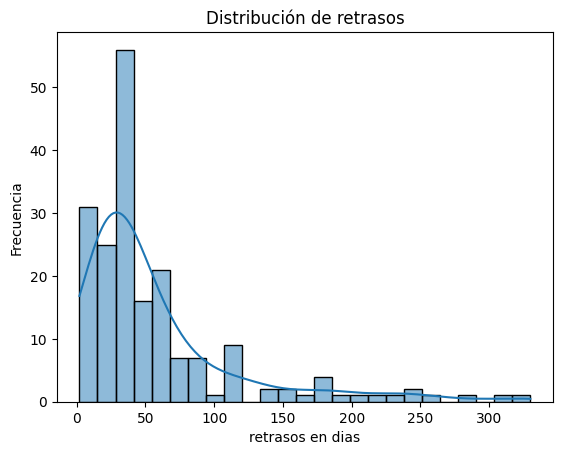

In [26]:
# Distribución de las desviaciones en costo
sns.histplot(retrasos, kde=True)
plt.title('Distribución de retrasos')
plt.xlabel('retrasos en dias')
plt.ylabel('Frecuencia')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


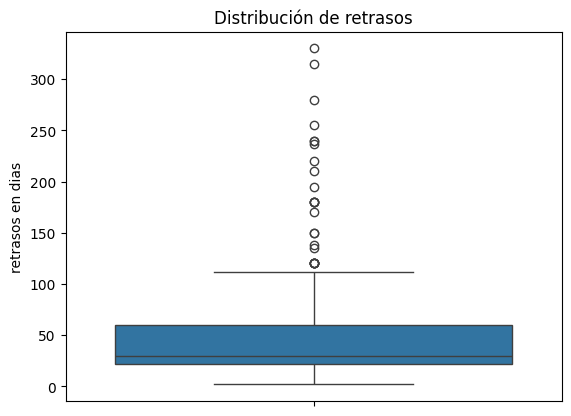

In [27]:
# Gráfico de caja para la distribución de los sobrecostos
sns.boxplot(retrasos)
plt.title('Distribución de retrasos')
plt.ylabel('retrasos en dias')
plt.show()

In [28]:
datos['Duración Total (días)'] = datos['duracion_contrato_dias'] + datos['retrasos_dias']

In [29]:
# Generar un nueva columna con el sobrecosto porcentual respecto al valor del contrato
datos['retrasos_porcentual'] = ((datos['Duración Total (días)'] - datos['duracion_contrato_dias']) / datos['duracion_contrato_dias']) * 100

# Resumen estadístico del sobrecosto porcentual
datos[datos['retrasos_porcentual'] > 0]['retrasos_porcentual'].describe()

,retrasos_porcentual
count,192.000000
mean,99.643464
std,180.545046
min,4.761905
25%,33.333333
50%,61.111111
75%,100.000000
max,1875.000000


In [30]:
# Contratos que tienen un sobrecosto superior al 50%?
sum(datos['retrasos_porcentual'] > 100)

41

In [32]:
# Contratos por modalidad
datos['modalidad'].value_counts()

,count
modalidad,
SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150 DE 2007),400
CONTRATACION MINIMA CUANTIA,215
LICITACION PUBLICA,166
REGIMEN ESPECIAL,85
LICITACION OBRA PUBLICA,71
CONTRATACION DIRECTA (LEY 1150 DE 2007),34
CONTRATOS Y CONVENIOS CON MAS DE DOS PARTES,4
SELECCION ABREVIADA DEL LITERAL H DEL NUMERAL 2 DEL ARTICULO 2 DE LA LEY 1150 DE 2007,2
CONCURSO DE DISENO ARQUITECTONICO,1


In [33]:
# Proporción de contratos por modalidad
datos['modalidad'].value_counts(normalize=True)

,proportion
modalidad,
SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150 DE 2007),0.408580
CONTRATACION MINIMA CUANTIA,0.219612
LICITACION PUBLICA,0.169561
REGIMEN ESPECIAL,0.086823
LICITACION OBRA PUBLICA,0.072523
CONTRATACION DIRECTA (LEY 1150 DE 2007),0.034729
CONTRATOS Y CONVENIOS CON MAS DE DOS PARTES,0.004086
SELECCION ABREVIADA DEL LITERAL H DEL NUMERAL 2 DEL ARTICULO 2 DE LA LEY 1150 DE 2007,0.002043
CONCURSO DE DISENO ARQUITECTONICO,0.001021


In [34]:
# Calcular la frecuencia de cada modalidad
modalidad_counts = datos['modalidad'].value_counts(normalize=True)

# Identificar modalidades con menos de 1% contratos
low_count_modalities = modalidad_counts[modalidad_counts < 0.01].index

# Reemplazar las modalidades con menos de 1% contratos por 'OTROS'
datos['modalidad_reducido'] = datos['modalidad'].replace(low_count_modalities, 'OTROS')

# Mostrar la nueva tabla de frecuencia
datos['modalidad_reducido'].value_counts()

,count
modalidad_reducido,
SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150 DE 2007),400
CONTRATACION MINIMA CUANTIA,215
LICITACION PUBLICA,166
REGIMEN ESPECIAL,85
LICITACION OBRA PUBLICA,71
CONTRATACION DIRECTA (LEY 1150 DE 2007),34
OTROS,8


In [35]:
datos

,uid,nombre_de_la_entidad,departamento_entidad,orden_entidad,modalidad,causal_contratacion_directa,objeto_a_contratar,detalle_objeto,cuantia_proceso,cuantia_contrato,...,estado_del_proceso,tiene_sobrecosto,sobrecosto_porcentual,retrasos_dias,duracion_contrato_dias,retrasos_diasbo,Duración Total (días),retrasos_porcentual,mes_inicio,modalidad_reducido
0,15-4-4221275-3896250,LA GUAJIRA - ALCALDIA MUNICIPIO DE BARRANCAS,LA GUAJIRA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,REGIMEN ESPECIAL,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MEJORAMIENTO Y ADECUACION DE LAS VIAS EXISTENT...,51.960000,51.960000,...,LIQUIDADO,False,0.000000,0,60,False,60,0.0,5,REGIMEN ESPECIAL
1,15-11-4173928-3984265,SANTANDER - ALCALDIA MUNICIPIO DE PIEDECUESTA,SANTANDER,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 4,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MEJORAMIENTO DE LAS VIAS TERCIARIAS DE LA VERE...,149.999947,149.999946,...,LIQUIDADO,False,0.000000,0,60,False,60,0.0,10,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...
2,21-11-12612688-12021477,CUNDINAMARCA - ALCALDIA MUNICIPIO DE FOSCA,CUNDINAMARCA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MEJORAMIENTO DE LA VIA QUE COMUNICA DESDE EL P...,150.000000,142.967967,...,LIQUIDADO,False,0.000000,0,240,False,240,0.0,7,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...
3,20-11-10445399-9709897,BOYACA - ALCALDIA MUNICIPIO DE PACHAVITA,BOYACA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MANTENIMIENTO Y MEJORAMIENTO VIAS VEREDALES EN...,162.103043,162.084746,...,LIQUIDADO,True,46.272090,45,90,True,135,50.0,4,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...
4,20-21-20342-10910037,BOYACA - ALCALDIA MUNICIPIO DE CHIVATA,BOYACA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,LICITACION OBRA PUBLICA,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MEJORAMIENTO DE LA VIA AVENIDA JIMENEZ - PONTE...,467.516765,441.787828,...,LIQUIDADO,True,35.809417,30,30,True,60,100.0,3,LICITACION OBRA PUBLICA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,15-11-4158615-3916756,SANTANDER - ALCALDIA MUNICIPIO DE PIEDECUESTA,SANTANDER,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 4,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MEJORAMIENTO DE LAS VIAS TERCIARIAS DE LA VERE...,36.980184,36.980171,...,LIQUIDADO,False,0.000000,0,30,False,30,0.0,9,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...
975,19-13-9651959-8811107,ANTIOQUIA - ALCALDIA MUNICIPIO DE OLAYA,ANTIOQUIA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MANTENIMIENTO PREVENTIVO DE LA VIA TERCIARIA Q...,23.000000,23.000000,...,LIQUIDADO,False,0.000000,0,20,False,20,0.0,7,CONTRATACION MINIMA CUANTIA
976,21-13-11996798-11158224,TOLIMA - ALCALDIA MUNICIPIO DE CHAPARRAL,TOLIMA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MANTENIMIENTO PUENTE PARA CAMINO DE HERRADURA ...,25.400813,25.340900,...,LIQUIDADO,False,0.000000,0,45,False,45,0.0,6,CONTRATACION MINIMA CUANTIA
977,19-11-9968957-9216325,BOYACA - ALCALDIA MUNICIPIO DE SAMACA,BOYACA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",CONSTRUCCION DE PLACA HUELLA PARA EL ACCESO AL...,81.326035,81.315081,...,LIQUIDADO,False,0.000000,0,20,False,20,0.0,11,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...


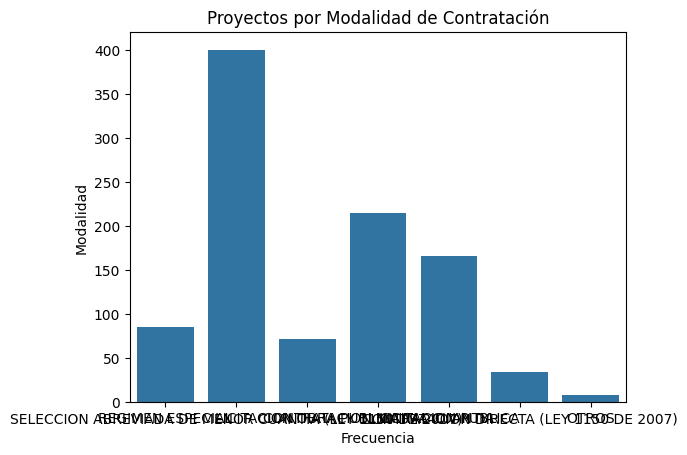

In [36]:
# Grafíco de barras de las modalidades de contratación
sns.countplot(data = datos, x = 'modalidad_reducido')
plt.title('Proyectos por Modalidad de Contratación')
plt.xlabel('Frecuencia')
plt.ylabel('Modalidad')
plt.show()

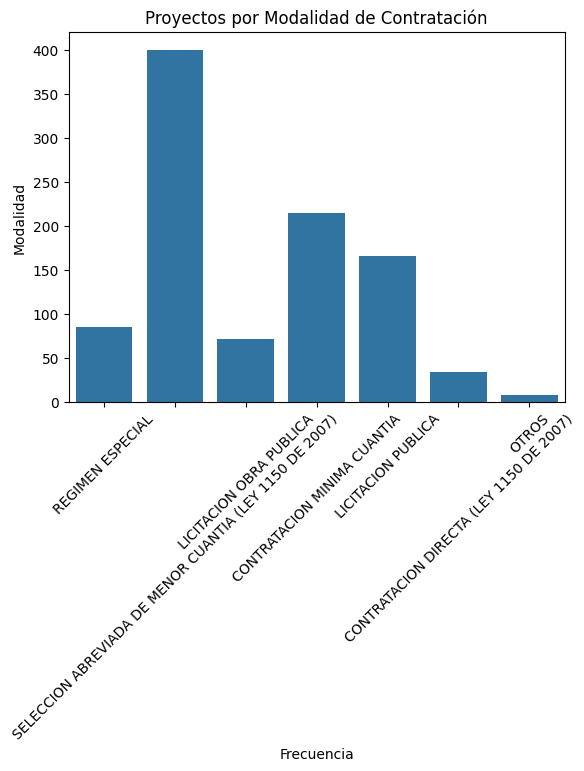

In [37]:
# Grafíco de barras de las modalidades de contratación
sns.countplot(data = datos, x = 'modalidad_reducido')
plt.title('Proyectos por Modalidad de Contratación')
plt.xlabel('Frecuencia')
plt.ylabel('Modalidad')
plt.xticks(rotation=45)
plt.show()

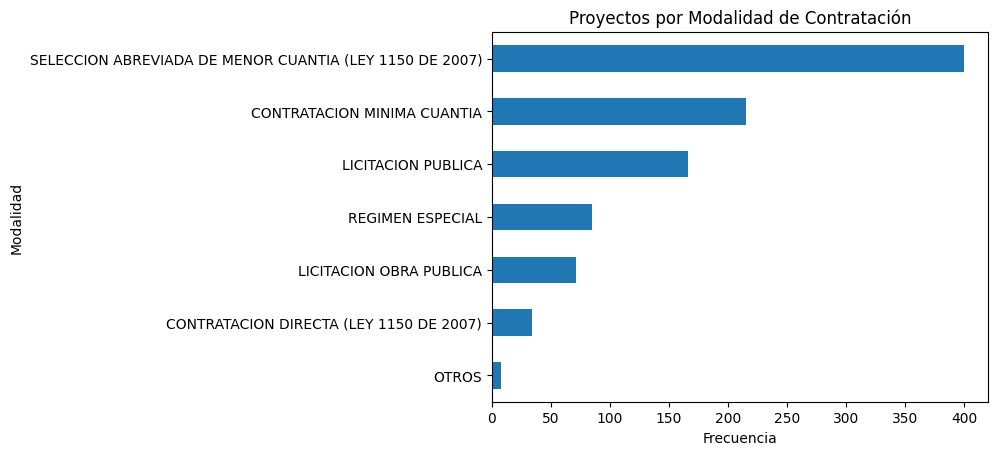

In [38]:
# Gráfico de Barras Horizontales
datos['modalidad_reducido'].value_counts(ascending=True).plot.barh()
plt.title('Proyectos por Modalidad de Contratación')
plt.xlabel('Frecuencia')
plt.ylabel('Modalidad')
plt.show()

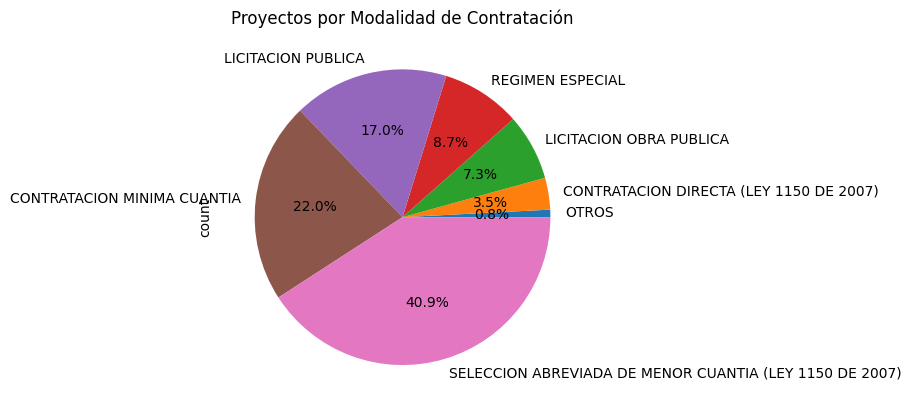

In [39]:
# Gráfico de torta
datos['modalidad_reducido'].value_counts(ascending=True).plot.pie(autopct='%1.1f%%')
plt.title('Proyectos por Modalidad de Contratación')
plt.show()

In [40]:
# Proyectos con desviaciones en costo por modalidad de contratación
proyectos_desv_costo = pd.crosstab(datos['modalidad_reducido'], datos['tiene_sobrecosto'])
proyectos_desv_costo

tiene_sobrecosto,False,True
modalidad_reducido,,
CONTRATACION DIRECTA (LEY 1150 DE 2007),30,4
CONTRATACION MINIMA CUANTIA,185,30
LICITACION OBRA PUBLICA,50,21
LICITACION PUBLICA,124,42
OTROS,8,0
REGIMEN ESPECIAL,78,7
SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150 DE 2007),317,83


In [41]:

# Porcentaje de proyectos con desviaciones en costo por modalidad de contratación
proyectos_desv_costo_perc = pd.crosstab(datos['modalidad_reducido'], datos['tiene_sobrecosto'], normalize='index')
proyectos_desv_costo_perc

tiene_sobrecosto,False,True
modalidad_reducido,,
CONTRATACION DIRECTA (LEY 1150 DE 2007),0.882353,0.117647
CONTRATACION MINIMA CUANTIA,0.860465,0.139535
LICITACION OBRA PUBLICA,0.704225,0.295775
LICITACION PUBLICA,0.746988,0.253012
OTROS,1.000000,0.000000
REGIMEN ESPECIAL,0.917647,0.082353
SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150 DE 2007),0.792500,0.207500


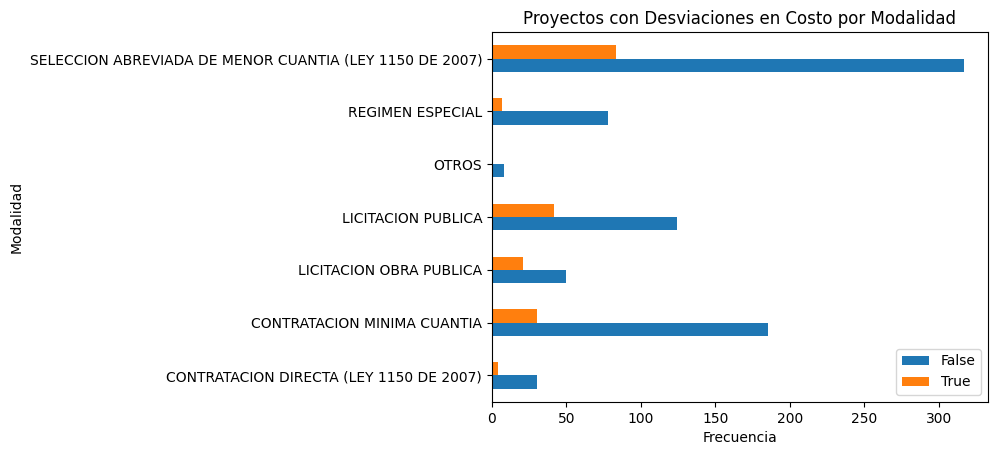

In [42]:
# Gráfico de barras de las desviaciones en costo por modalidad
proyectos_desv_costo.plot.barh()
plt.legend(loc='lower right')
plt.title('Proyectos con Desviaciones en Costo por Modalidad')
plt.ylabel('Modalidad')
plt.xlabel('Frecuencia')
plt.show()

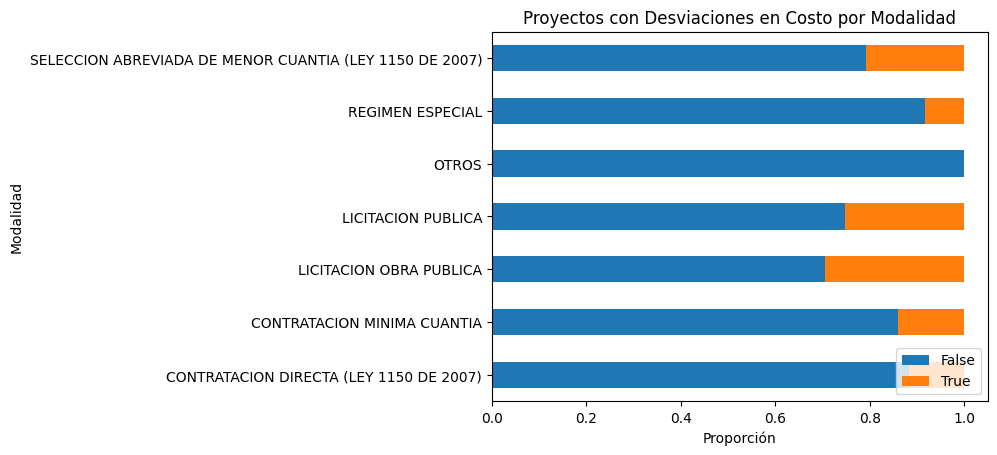

In [43]:

# Gráfico de barras agrupadas para mostrar la proporción de proyectos
# con desviaciones en costo por modalidad
proyectos_desv_costo_perc.plot.barh(stacked=True)
plt.title('Proyectos con Desviaciones en Costo por Modalidad')
plt.ylabel('Modalidad')
plt.xlabel('Proporción')
plt.legend(loc='lower right')
plt.show()


In [44]:

# Sobrecosto porcentual por modalidad
sobrecostos_modalidad = datos.loc[datos['sobrecosto_porcentual'] > 0, ['modalidad','sobrecosto_porcentual']]
sobrecostos_modalidad.groupby('modalidad')['sobrecosto_porcentual'].mean().sort_values(ascending=False)

,sobrecosto_porcentual
modalidad,
CONTRATACION DIRECTA (LEY 1150 DE 2007),55.379930
CONTRATACION MINIMA CUANTIA,35.481702
SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150 DE 2007),34.125097
REGIMEN ESPECIAL,28.356730
LICITACION PUBLICA,24.646579
LICITACION OBRA PUBLICA,16.331797


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


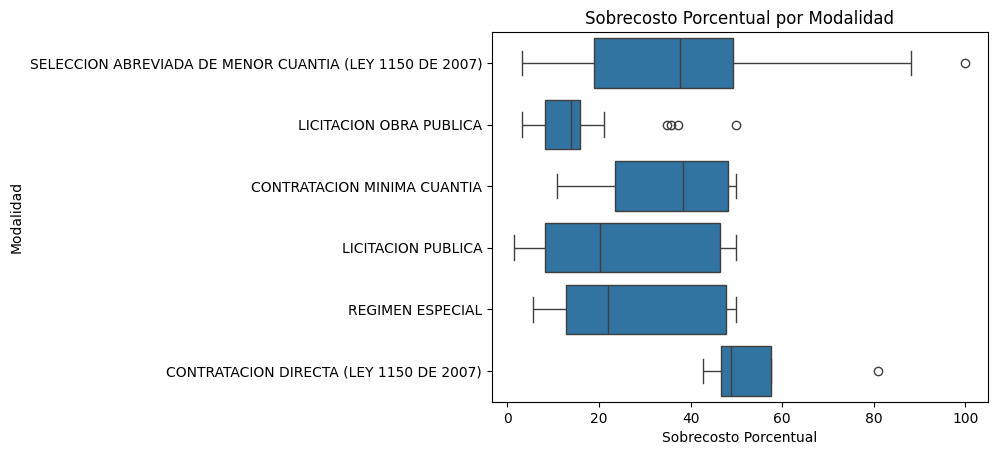

In [45]:
# Sobrecosto porcentual por modalidad
sns.boxplot(data=sobrecostos_modalidad, x='sobrecosto_porcentual', y='modalidad')
plt.title('Sobrecosto Porcentual por Modalidad')
plt.xlabel('Sobrecosto Porcentual')
plt.ylabel('Modalidad')
plt.show()

In [46]:
datos.head(1)

,uid,nombre_de_la_entidad,departamento_entidad,orden_entidad,modalidad,causal_contratacion_directa,objeto_a_contratar,detalle_objeto,cuantia_proceso,cuantia_contrato,...,estado_del_proceso,tiene_sobrecosto,sobrecosto_porcentual,retrasos_dias,duracion_contrato_dias,retrasos_diasbo,Duración Total (días),retrasos_porcentual,mes_inicio,modalidad_reducido
0,15-4-4221275-3896250,LA GUAJIRA - ALCALDIA MUNICIPIO DE BARRANCAS,LA GUAJIRA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,REGIMEN ESPECIAL,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MEJORAMIENTO Y ADECUACION DE LAS VIAS EXISTENT...,51.96,51.96,...,LIQUIDADO,False,0.0,0,60,False,60,0.0,5,REGIMEN ESPECIAL


In [47]:
###EJERCICIO
# Proyectos con desviaciones en TIEMPO por modalidad de contratación
proyectos_desv_tiemp = pd.crosstab(datos['modalidad_reducido'], datos['retrasos_diasbo'], margins=True)
proyectos_desv_tiemp

retrasos_diasbo,False,True,All
modalidad_reducido,,,
CONTRATACION DIRECTA (LEY 1150 DE 2007),31,3,34
CONTRATACION MINIMA CUANTIA,198,17,215
LICITACION OBRA PUBLICA,41,30,71
LICITACION PUBLICA,110,56,166
OTROS,8,0,8
REGIMEN ESPECIAL,73,12,85
SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150 DE 2007),326,74,400
All,787,192,979


In [48]:
##Porcentaje de proyectos con desviaciones de tiempo en costo por modalidad de contratación
proyectos_desv_tiemp_perc = pd.crosstab(datos['modalidad_reducido'], datos['retrasos_diasbo'], normalize='index',margins=True)
proyectos_desv_tiemp_perc

retrasos_diasbo,False,True
modalidad_reducido,,
CONTRATACION DIRECTA (LEY 1150 DE 2007),0.911765,0.088235
CONTRATACION MINIMA CUANTIA,0.920930,0.079070
LICITACION OBRA PUBLICA,0.577465,0.422535
LICITACION PUBLICA,0.662651,0.337349
OTROS,1.000000,0.000000
REGIMEN ESPECIAL,0.858824,0.141176
SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150 DE 2007),0.815000,0.185000
All,0.803882,0.196118


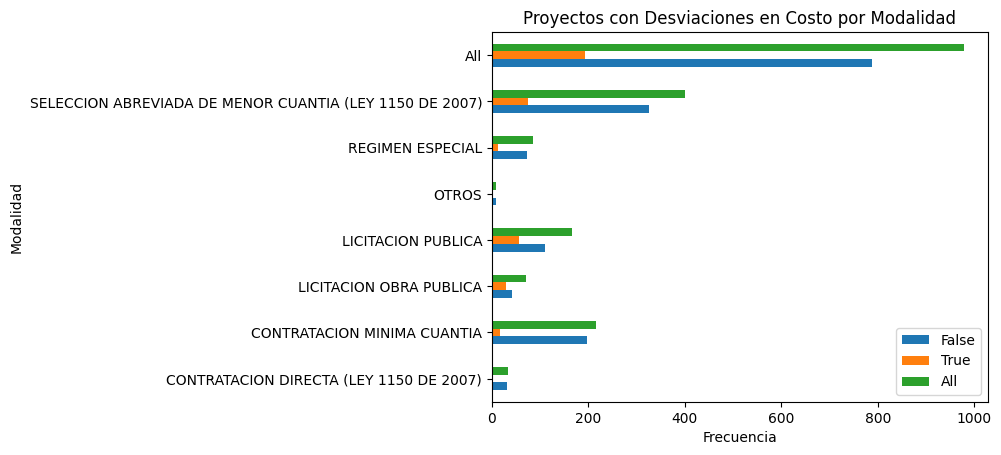

In [49]:
# Gráfico de proyectos con desviaciones en tiempo por modalidad
# Gráfico de barras de las desviaciones en costo por modalidad
proyectos_desv_tiemp.plot.barh()
plt.legend(loc='lower right')
plt.title('Proyectos con Desviaciones en Costo por Modalidad')
plt.ylabel('Modalidad')
plt.xlabel('Frecuencia')
plt.show()

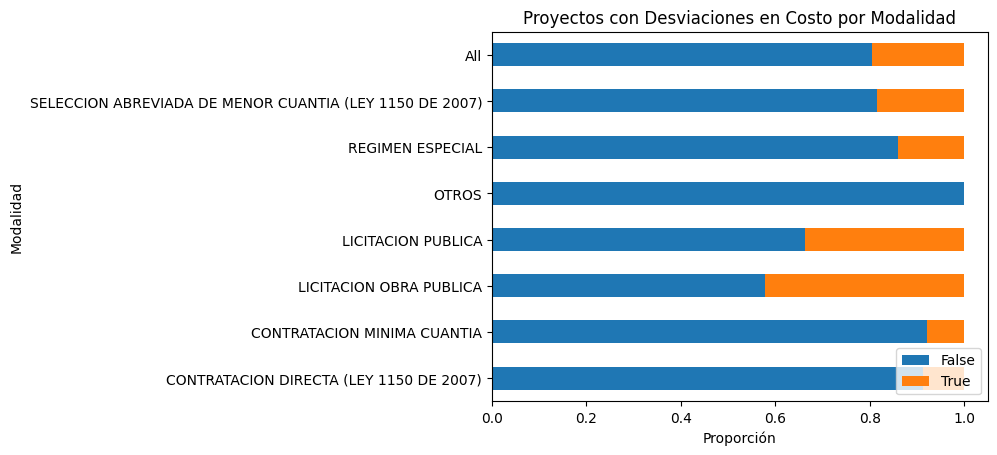

In [50]:
# Gráfico de barras agrupadas para mostrar la proporción de proyectos
# con desviaciones en costo por modalidad
proyectos_desv_tiemp_perc.plot.barh(stacked=True)
plt.title('Proyectos con Desviaciones en Costo por Modalidad')
plt.ylabel('Modalidad')
plt.xlabel('Proporción')
plt.legend(loc='lower right')
plt.show()

In [51]:
# Restraso porcentual promedio por modalidad
sobrecostos_modalidad = datos.loc[datos['retrasos_porcentual'] > 0, ['modalidad','retrasos_porcentual']]
sobrecostos_modalidad.groupby('modalidad')['retrasos_porcentual'].mean().sort_values(ascending=False)

,retrasos_porcentual
modalidad,
CONTRATACION DIRECTA (LEY 1150 DE 2007),211.111111
LICITACION OBRA PUBLICA,123.278199
REGIMEN ESPECIAL,105.500922
SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150 DE 2007),103.278711
CONTRATACION MINIMA CUANTIA,82.794118
LICITACION PUBLICA,80.066610


In [52]:
# Restraso porcentual promedio por modalidad
sobrecostos_modalidad = datos.loc[datos['retrasos_porcentual'] > 0, ['modalidad_reducido','retrasos_porcentual']]
sobrecostos_modalidad.groupby('modalidad_reducido')['retrasos_porcentual'].mean().sort_values(ascending=False)

,retrasos_porcentual
modalidad_reducido,
CONTRATACION DIRECTA (LEY 1150 DE 2007),211.111111
LICITACION OBRA PUBLICA,123.278199
REGIMEN ESPECIAL,105.500922
SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150 DE 2007),103.278711
CONTRATACION MINIMA CUANTIA,82.794118
LICITACION PUBLICA,80.066610


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


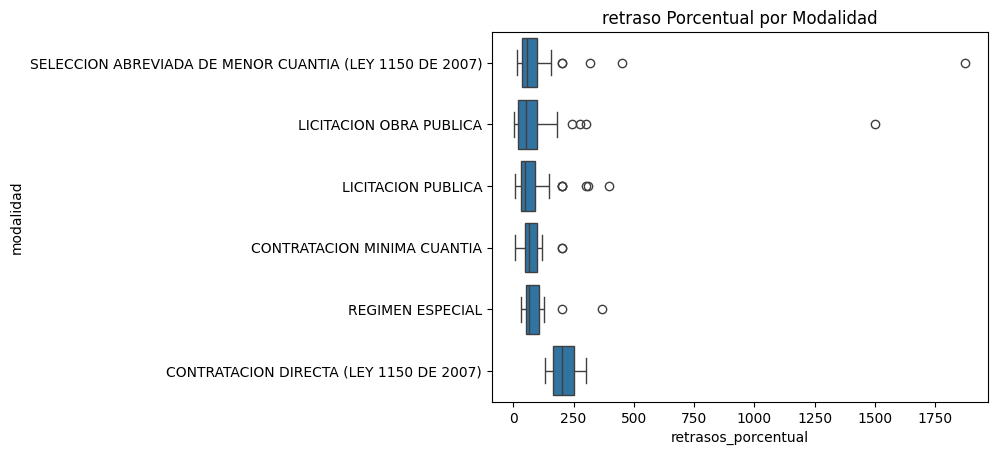

In [53]:
# Gráfico de caja: Retraso porcentual por modalidad
sns.boxplot(data=sobrecostos_modalidad, x='retrasos_porcentual', y='modalidad_reducido')
plt.title('retraso Porcentual por Modalidad')
plt.xlabel('retrasos_porcentual')
plt.ylabel('modalidad')
plt.show()

In [54]:
datos.head(1)

,uid,nombre_de_la_entidad,departamento_entidad,orden_entidad,modalidad,causal_contratacion_directa,objeto_a_contratar,detalle_objeto,cuantia_proceso,cuantia_contrato,...,estado_del_proceso,tiene_sobrecosto,sobrecosto_porcentual,retrasos_dias,duracion_contrato_dias,retrasos_diasbo,Duración Total (días),retrasos_porcentual,mes_inicio,modalidad_reducido
0,15-4-4221275-3896250,LA GUAJIRA - ALCALDIA MUNICIPIO DE BARRANCAS,LA GUAJIRA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,REGIMEN ESPECIAL,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MEJORAMIENTO Y ADECUACION DE LAS VIAS EXISTENT...,51.96,51.96,...,LIQUIDADO,False,0.0,0,60,False,60,0.0,5,REGIMEN ESPECIAL


In [68]:
datos['fecha_ini_ejec_contrato'] = pd.to_datetime(datos['fecha_ini_ejec_contrato'])
datos['mes_inicio'] = datos['fecha_ini_ejec_contrato'].dt.month

In [69]:
agrupado_por_mestotal = datos.groupby('mes_inicio').size()
print(agrupado_por_mestotal)

mes_inicio
1      42
2      57
3      88
4      73
5      71
6      83
7      92
8      69
9      94
10     79
11    101
12    130
dtype: int64


In [70]:
agrupado_por_mestotal.sum()

979

In [127]:
datos_filtradoCos = datos[datos['sobrecosto_porcentual'] > 0]

In [72]:
agrupado_por_mestotal2 = datos_filtradoCos.groupby('mes_inicio').size()
print(agrupado_por_mestotal2)

mes_inicio
1      8
2     12
3     15
4     19
5     16
6     20
7     11
8     13
9     15
10    14
11    19
12    25
dtype: int64


In [73]:
agrupado_por_mestotal2.sum()

187

In [89]:
datos_filtradotiemp = datos[datos['retrasos_dias'] > 0]

In [75]:
agrupado_por_mestotal3 = datos_filtradotiemp.groupby('mes_inicio').size()
print(agrupado_por_mestotal3)

mes_inicio
1      7
2     11
3     12
4     14
5     19
6     21
7     10
8     10
9     21
10    15
11    24
12    28
dtype: int64


In [76]:
agrupado_por_mestotal3.sum()

192

In [77]:
meses=agrupado_por_mestotal3.index

In [78]:
cantidad_sobrecostos=agrupado_por_mestotal2.values

In [79]:
cantidad_retrasos=agrupado_por_mestotal3.values

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

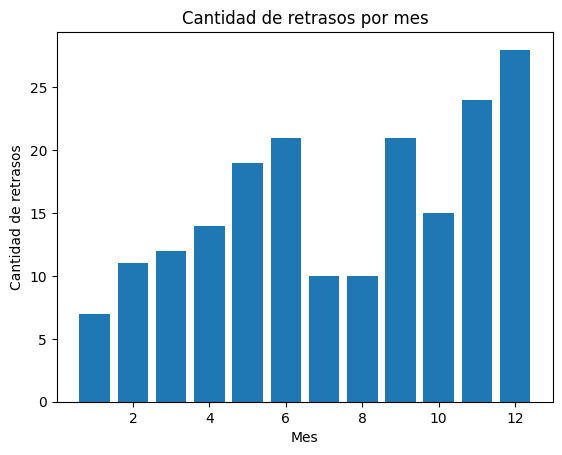

In [80]:
plt.bar(meses, cantidad_retrasos)
plt.xlabel('Mes')
plt.ylabel('Cantidad de retrasos')
plt.title('Cantidad de retrasos por mes')
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

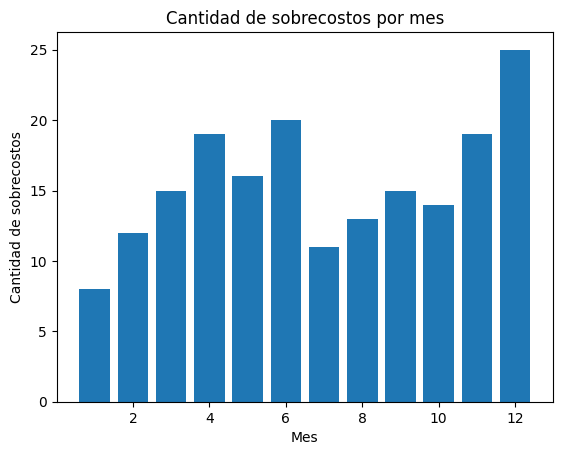

In [81]:
plt.bar(meses, cantidad_sobrecostos)
plt.xlabel('Mes')
plt.ylabel('Cantidad de sobrecostos')
plt.title('Cantidad de sobrecostos por mes')
plt

In [82]:

datos['Año_inicio'] = datos['fecha_ini_ejec_contrato'].dt.year

In [83]:
datos.head(1)

,uid,nombre_de_la_entidad,departamento_entidad,orden_entidad,modalidad,causal_contratacion_directa,objeto_a_contratar,detalle_objeto,cuantia_proceso,cuantia_contrato,...,tiene_sobrecosto,sobrecosto_porcentual,retrasos_dias,duracion_contrato_dias,retrasos_diasbo,Duración Total (días),retrasos_porcentual,mes_inicio,modalidad_reducido,Año_inicio
0,15-4-4221275-3896250,LA GUAJIRA - ALCALDIA MUNICIPIO DE BARRANCAS,LA GUAJIRA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,REGIMEN ESPECIAL,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MEJORAMIENTO Y ADECUACION DE LAS VIAS EXISTENT...,51.96,51.96,...,False,0.0,0,60,False,60,0.0,5,REGIMEN ESPECIAL,2015


In [85]:
agrupado_por_añototal = datos.groupby('Año_inicio').size()
print(agrupado_por_añototal)

Año_inicio
2014      1
2015    128
2016     66
2017    170
2018    188
2019    205
2020     65
2021     63
2022     58
2023     34
2024      1
dtype: int64


In [90]:
agrupado_por_añototal3 = datos_filtradotiemp.groupby('Año_inicio').size()
print(agrupado_por_añototal3)

Año_inicio
2015    19
2016    24
2017    42
2018    26
2019    36
2020    18
2021    14
2022    11
2023     2
dtype: int64


In [95]:
grupado_por_añototal2 = datos_filtradoCos.groupby('Año_inicio').size()
print(grupado_por_añototal2)

Año_inicio
2015    22
2016    24
2017    35
2018    42
2019    30
2020    12
2021     9
2022    10
2023     3
dtype: int64


In [96]:
año2019=datos_filtradoCos[datos_filtradoCos['Año_inicio'] == 2019]

In [98]:
agrupado2019= año2019.groupby('mes_inicio').size()
print(agrupado2019)

mes_inicio
1     1
2     3
3     5
4     3
5     4
6     2
7     2
8     1
9     2
10    2
12    5
dtype: int64


In [101]:
datos.columns

Index(['uid', 'nombre_de_la_entidad', 'departamento_entidad', 'orden_entidad',
       'modalidad', 'causal_contratacion_directa', 'objeto_a_contratar',
       'detalle_objeto', 'cuantia_proceso', 'cuantia_contrato',
       'valor_total_de_adiciones', 'valor_contrato_con_adiciones',
       'anno_firma', 'fecha_firma', 'fecha_ini_ejec_contrato',
       'plazo_de_ejec_del_contrato', 'rango_de_ejec_del_contrato',
       'tiempo_adiciones_en_dias', 'tiempo_adiciones_en_meses',
       'fecha_fin_ejec_contrato', 'id_adjudicacion', 'urlproceso',
       'nit_de_la_entidad', 'identificacion_del_contratista',
       'dpto_y_muni_contratista', 'municipio_entidad',
       'nom_razon_social_contratista', 'estado_del_proceso',
       'tiene_sobrecosto', 'sobrecosto_porcentual', 'retrasos_dias',
       'duracion_contrato_dias', 'retrasos_diasbo', 'Duración Total (días)',
       'retrasos_porcentual', 'mes_inicio', 'modalidad_reducido',
       'Año_inicio'],
      dtype='object')

In [102]:
año2020=datos_filtradoCos[datos_filtradoCos['Año_inicio'] == 2020]

In [103]:
agrupado2020= año2020.groupby('mes_inicio').size()
print(agrupado2020)

mes_inicio
1     1
2     1
3     3
4     1
6     3
10    1
11    1
12    1
dtype: int64


In [ ]:

datos['fecha sin adiciones'] = datos['fecha_ini_ejec_contrato'].dt.month

In [104]:
pd.set_option('display.max_columns', None)

In [108]:
datos_filtradotiemp.head(7)

,uid,nombre_de_la_entidad,departamento_entidad,orden_entidad,modalidad,causal_contratacion_directa,objeto_a_contratar,detalle_objeto,cuantia_proceso,cuantia_contrato,valor_total_de_adiciones,valor_contrato_con_adiciones,anno_firma,fecha_firma,fecha_ini_ejec_contrato,plazo_de_ejec_del_contrato,rango_de_ejec_del_contrato,tiempo_adiciones_en_dias,tiempo_adiciones_en_meses,fecha_fin_ejec_contrato,id_adjudicacion,urlproceso,nit_de_la_entidad,identificacion_del_contratista,dpto_y_muni_contratista,municipio_entidad,nom_razon_social_contratista,estado_del_proceso,tiene_sobrecosto,sobrecosto_porcentual,retrasos_dias,duracion_contrato_dias,retrasos_diasbo,Duración Total (días),retrasos_porcentual,mes_inicio,modalidad_reducido,Año_inicio
3,20-11-10445399-9709897,BOYACA - ALCALDIA MUNICIPIO DE PACHAVITA,BOYACA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MANTENIMIENTO Y MEJORAMIENTO VIAS VEREDALES EN...,162.103043,162.084746,75.000000,237.084746,2020,2020-03-10T00:00:00.000,2020-04-01,3,M,45,0,2020-08-01T00:00:00.000,9709897,{'url': 'https://www.contratos.gov.co/consulta...,800028461,900485495,BOYACA,PACHAVITA,"SAGA S.A.S, CONSTRUIMOS EL FUTURO",LIQUIDADO,True,46.272090,45,90,True,135,50.000000,4,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,2020
4,20-21-20342-10910037,BOYACA - ALCALDIA MUNICIPIO DE CHIVATA,BOYACA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,LICITACION OBRA PUBLICA,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MEJORAMIENTO DE LA VIA AVENIDA JIMENEZ - PONTE...,467.516765,441.787828,158.201644,599.989472,2021,2021-03-08T00:00:00.000,2021-03-11,1,M,0,1,2021-05-11T00:00:00.000,10910037,{'url': 'https://www.contratos.gov.co/consulta...,800014989-1,901451682,BOYACA,CHIVATA,UNION TEMPORAL CHIVATA 2020,LIQUIDADO,True,35.809417,30,30,True,60,100.000000,3,LICITACION OBRA PUBLICA,2021
8,18-1-190669-7618772,SANTANDER - ALCALDIA MUNICIPIO DE BUCARAMANGA,SANTANDER,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 1,LICITACION PUBLICA,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",CONSTRUCCION DE PLACA HUELLAS Y REPOSICION DE ...,1277.358628,1250.571151,400.000000,1650.571151,2018,2018-07-10T00:00:00.000,2018-08-27,3,M,30,0,2018-12-27T00:00:00.000,7618772,{'url': 'https://www.contratos.gov.co/consulta...,890201222,901193544,SANTANDER,BUCARAMANGA,CONSORCIO VARGAS NP INGENIERIA,LIQUIDADO,True,31.985385,30,90,True,120,33.333333,8,LICITACION PUBLICA,2018
12,15-11-3913923-3794831,ANTIOQUIA - ALCALDIA MUNICIPIO DE RIONEGRO,ANTIOQUIA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 2,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",PAVIMENTACION EN CONCRETO RIGIDO Y OBRAS COMPL...,289.381904,288.881726,144.440863,433.322589,2015,2015-07-13T00:00:00.000,2015-07-27,2,M,0,1,2015-10-27T00:00:00.000,3794831,{'url': 'https://www.contratos.gov.co/consulta...,890204646-3,900434281-0,ANTIOQUIA,RIONEGRO,CONSTRUCCIONES SEGURAS S.A.S,LIQUIDADO,True,50.000000,30,60,True,90,50.000000,7,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,2015
16,21-11-12522290-11711976,CALDAS - ALCALDIA MUNICIPIO DE PACORA,CALDAS,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",CONTRATAR A TODO COSTO LA CONSTRUCION DE PLACA...,199.998466,199.018467,0.000000,199.018467,2021,2021-12-23T00:00:00.000,2021-12-23,8,D,0,5,2022-05-30T00:00:00.000,11711976,{'url': 'https://www.contratos.gov.co/consulta...,899999475-4,900359695,CALDAS,PACORA,INNOVA PROYECTOS SAS,LIQUIDADO,False,0.000000,150,8,True,158,1875.000000,12,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,2021
20,18-1-186796-7364120,ANTIOQUIA - ALCALDIA MUNICIPIO DE GIRARDOTA,ANTIOQUIA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 5,LICITACION PUBLICA,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MEJORAMIENTO DE ALGUNAS VIAS TERCIARIAS EN EL ...,710.924631,710.924631,350.454234,1061.378865,2

In [110]:
datos['fecha_fin_sin'] = (datos['fecha_ini_ejec_contrato'] + pd.to_timedelta(datos['duracion_contrato_dias'], unit='D')).dt.date


In [111]:
datos.head(5)

,uid,nombre_de_la_entidad,departamento_entidad,orden_entidad,modalidad,causal_contratacion_directa,objeto_a_contratar,detalle_objeto,cuantia_proceso,cuantia_contrato,valor_total_de_adiciones,valor_contrato_con_adiciones,anno_firma,fecha_firma,fecha_ini_ejec_contrato,plazo_de_ejec_del_contrato,rango_de_ejec_del_contrato,tiempo_adiciones_en_dias,tiempo_adiciones_en_meses,fecha_fin_ejec_contrato,id_adjudicacion,urlproceso,nit_de_la_entidad,identificacion_del_contratista,dpto_y_muni_contratista,municipio_entidad,nom_razon_social_contratista,estado_del_proceso,tiene_sobrecosto,sobrecosto_porcentual,retrasos_dias,duracion_contrato_dias,retrasos_diasbo,Duración Total (días),retrasos_porcentual,mes_inicio,modalidad_reducido,Año_inicio,fecha_fin_sin
0,15-4-4221275-3896250,LA GUAJIRA - ALCALDIA MUNICIPIO DE BARRANCAS,LA GUAJIRA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,REGIMEN ESPECIAL,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MEJORAMIENTO Y ADECUACION DE LAS VIAS EXISTENT...,51.960000,51.960000,0.000000,51.960000,2015,2015-04-28T00:00:00.000,2015-05-12,2,M,0,0,2015-07-12T00:00:00.000,3896250,{'url': 'https://www.contratos.gov.co/consulta...,800099223-3,900514557-1,LA GUAJIRA,BARRANCAS,ASOCIACION DE CAFICULTORES DE BARRANCAS,LIQUIDADO,False,0.000000,0,60,False,60,0.0,5,REGIMEN ESPECIAL,2015,2015-07-11
1,15-11-4173928-3984265,SANTANDER - ALCALDIA MUNICIPIO DE PIEDECUESTA,SANTANDER,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 4,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MEJORAMIENTO DE LAS VIAS TERCIARIAS DE LA VERE...,149.999947,149.999946,0.000000,149.999946,2015,2015-10-19T00:00:00.000,2015-10-19,2,M,0,0,2015-12-19T00:00:00.000,3984265,{'url': 'https://www.contratos.gov.co/consulta...,817000992-5,9008974759,SANTANDER,PIEDECUESTA,UNION TEMPORAL HUELLAS 2015,LIQUIDADO,False,0.000000,0,60,False,60,0.0,10,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,2015,2015-12-18
2,21-11-12612688-12021477,CUNDINAMARCA - ALCALDIA MUNICIPIO DE FOSCA,CUNDINAMARCA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MEJORAMIENTO DE LA VIA QUE COMUNICA DESDE EL P...,150.000000,142.967967,0.000000,142.967967,2022,2022-03-17T00:00:00.000,2022-07-01,8,M,0,0,2023-03-01T00:00:00.000,12021477,{'url': 'https://www.contratos.gov.co/consulta...,899999420,901089904,CUNDINAMARCA,FOSCA,CONTRUCTORA PG S.A.S,LIQUIDADO,False,0.000000,0,240,False,240,0.0,7,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,2022,2023-02-26
3,20-11-10445399-9709897,BOYACA - ALCALDIA MUNICIPIO DE PACHAVITA,BOYACA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MANTENIMIENTO Y MEJORAMIENTO VIAS VEREDALES EN...,162.103043,162.084746,75.000000,237.084746,2020,2020-03-10T00:00:00.000,2020-04-01,3,M,45,0,2020-08-01T00:00:00.000,9709897,{'url': 'https://www.contratos.gov.co/consulta...,800028461,900485495,BOYACA,PACHAVITA,"SAGA S.A.S, CONSTRUIMOS EL FUTURO",LIQUIDADO,True,46.272090,45,90,True,135,50.0,4,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,2020,2020-06-30
4,20-21-20342-10910037,BOYACA - ALCALDIA MUNICIPIO DE CHIVATA,BOYACA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,LICITACION OBRA PUBLICA,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MEJORAMIENTO DE LA VIA AVENIDA JIMENEZ - PONTE...,467.516765,441.787828,158.201644,599.989472,2021,2021-03-08T00:00:00.000,2021-03-11,1,M,0,1,2021-05-11T00:00:00.000,10910037,{'url': 'https://www.contratos.gov.co/consulta...,800014989-1,901451682,BOYACA,CHIVATA,UNION TEMPORAL CHIVATA 2020,LIQUIDADO,True,35.809417,30,30,True,60,100.0,3,LICITACION OBRA PUBLICA,2021,2021-04-10


In [128]:
costosfin2020=datos_filtradoCos[datos_filtradoCos['Año_fin'] == 2020]

In [120]:
datos['fecha_fin_sin'] = pd.to_datetime(datos['fecha_fin_sin'], errors='coerce')
datos['Año_fin'] = datos['fecha_fin_sin'].dt.year

In [121]:
datos['mes_fin'] = datos['fecha_fin_sin'].dt.month

In [129]:
costosfin2020.head(5)

,uid,nombre_de_la_entidad,departamento_entidad,orden_entidad,modalidad,causal_contratacion_directa,objeto_a_contratar,detalle_objeto,cuantia_proceso,cuantia_contrato,valor_total_de_adiciones,valor_contrato_con_adiciones,anno_firma,fecha_firma,fecha_ini_ejec_contrato,plazo_de_ejec_del_contrato,rango_de_ejec_del_contrato,tiempo_adiciones_en_dias,tiempo_adiciones_en_meses,fecha_fin_ejec_contrato,id_adjudicacion,urlproceso,nit_de_la_entidad,identificacion_del_contratista,dpto_y_muni_contratista,municipio_entidad,nom_razon_social_contratista,estado_del_proceso,tiene_sobrecosto,sobrecosto_porcentual,retrasos_dias,duracion_contrato_dias,retrasos_diasbo,Duración Total (días),retrasos_porcentual,mes_inicio,modalidad_reducido,Año_inicio,fecha_fin_sin,Año_fin,mes_fin
3,20-11-10445399-9709897,BOYACA - ALCALDIA MUNICIPIO DE PACHAVITA,BOYACA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MANTENIMIENTO Y MEJORAMIENTO VIAS VEREDALES EN...,162.103043,162.084746,75.000000,237.084746,2020,2020-03-10T00:00:00.000,2020-04-01,3,M,45,0,2020-08-01T00:00:00.000,9709897,{'url': 'https://www.contratos.gov.co/consulta...,800028461,900485495,BOYACA,PACHAVITA,"SAGA S.A.S, CONSTRUIMOS EL FUTURO",LIQUIDADO,True,46.272090,45,90,True,135,50.000000,4,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,2020,2020-06-30,2020,6
22,20-13-11334688-10497588,CALDAS - ALCALDIA MUNICIPIO DE MANZANARES,CALDAS,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",CONTRATAR A TODO COSTO LA CONSTRUCCION DE PLAC...,24.000000,23.534205,11.767102,35.301307,2020,2020-11-25T00:00:00.000,2020-11-25,30,D,21,0,2021-01-15T00:00:00.000,10497588,{'url': 'https://www.contratos.gov.co/consulta...,800094711-3,901383034,CALDAS,MANZANARES,CONSORCIO ZETA,LIQUIDADO,True,49.999998,21,30,True,51,70.000000,11,CONTRATACION MINIMA CUANTIA,2020,2020-12-25,2020,12
25,20-11-10447294-9719607,BOYACA - ALCALDIA MUNICIPIO DE TIBANA,BOYACA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MEJORAMIENTO Y CONSERVACION DE LA MALLA VIAL R...,239.430735,239.415527,52.629385,292.044912,2020,2020-03-16T00:00:00.000,2020-03-20,2,M,23,0,2020-05-20T00:00:00.000,9719607,{'url': 'https://www.contratos.gov.co/consulta...,891800860,901376695,BOYACA,TIBANA,CONSORCIO VIAL TIBANA 2020,LIQUIDADO,True,21.982444,23,60,True,83,38.333333,3,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,2020,2020-05-19,2020,5
27,20-11-10434076-9708882,BOYACA - ALCALDIA MUNICIPIO DE BOYACA,BOYACA,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MANTENIMIENTO Y MEJORAMIENTO DE VIAS TERCIARIA...,129.932766,129.932766,12.860315,142.793081,2020,2020-03-17T00:00:00.000,2020-03-17,60,D,0,0,2020-05-16T00:00:00.000,9708882,{'url': 'https://www.contratos.gov.co/consulta...,800023383,7175815,BOYACA,BOYACA,FREDY OSWALDO DUITAMA VACCA,LIQUIDADO,True,9.897669,0,60,False,60,0.000000,3,SELECCION ABREVIADA DE MENOR CUANTIA (LEY 1150...,2020,2020-05-16,2020,5
367,19-21-15577-9671944,CASANARE - ALCALDIA MUNICIPIO DE SABANALARGA,CASANARE,TERRITORIAL DISTRITAL MUNICIPAL NIVEL 6,LICITACION OBRA PUBLICA,NO DEFINIDO,"TERRENOS, EDIFICIOS, ESTRUCTURAS Y VIAS",MEJORAMIENTO DE LAS VIAS TERCIARIAS EN LAS VER...,4749.982265,4719.107379,173.440239,4892.547618,2019,2019-12-31T00:00:00.000,2019-12-31,6,M,50,4,2020-11-30T00:00:00.000,9671944,{'url': 'https://www.contratos.gov.co/consulta...,800094844-4,901351758,CASANARE,SABANALARGA,CONSORCIO HUELLAS DE SABANA,LIQUIDADO,True,3.675276,170,180,True,350,94.444444,12,LICITACION OBRA PUBLICA,2019,2020-06-28,2020,6


In [130]:
agrupadofin2020= costosfin2020.groupby('mes_fin').size()
print(agrupadofin2020)

mes_fin
1     2
4     3
5     2
6     2
7     1
9     1
10    1
12    1
dtype: int64


In [131]:
grupado_por_añofin = datos_filtradoCos.groupby('Año_fin').size()
print(grupado_por_añofin)

Año_fin
2015    16
2016    18
2017    43
2018    42
2019    31
2020    13
2021    10
2022     9
2023     5
dtype: int64


In [132]:
grupado_por_totalfin = datos.groupby('Año_fin').size()
print(grupado_por_totalfin)

Año_fin
2015     97
2016     76
2017    165
2018    192
2019    206
2020     76
2021     62
2022     61
2023     42
2024      2
dtype: int64


In [133]:
grupado_por_totalfin1 = datos.groupby('mes_fin').size()
print(grupado_por_totalfin1)

mes_fin
1      79
2      46
3      54
4      64
5      58
6      84
7      76
8      76
9      82
10     76
11     85
12    199
dtype: int64
